# Lowry Lab Microbiome analysis pipeline


This is desgined to be run as a Jupyter Notebook, which requires Python and Jupyter to be installed. Jupyter notebook is a good way to keep track of all code that you've run, so I recommend using it.

However, if just viewing this document as a pdf, you can copy/paste any command that starts with `!` or `%` into the terminal. To view .qzv files, go to [QIIME2 View](https://view.qiime2.org/). Commands that do not start with those characters are Python code and must be run in a Python environment, such as Jupyter Notebook.

## Sample processing details
#### DNA Extraction 
INSERT INFORMATION  
#### PCR 
INSERT INFORMATION
#### Normalization 
INSERT INFORMATION
#### Sequencing 
INSERT INFORMATION

## Setting up the environment

### Conda and QIIME2

From Sangita's pipeline:

**Installing Miniconda:**
Go to https://conda.io/miniconda.html and double-click on the Miniconda installer (choose the .pkg
hyperlink) under your platform of choice (Windows, Mac OS, Linux OS).

**Installing QIIME2:**
Open a new Terminal window. You will need to run the following commands to verify that your version
of Miniconda is up-to-date, create a new conda environment called qiime2-2020.11, and then remove
the installation file:

`conda update conda
conda install wget`

Visit the [QIIME2 installation tutorial](https://docs.qiime2.org/2020.11/install/native/) for up to date instructions, but this should hold for the 2020.11 version if you're using a Mac:

`wget https://data.qiime2.org/distro/core/qiime2-2020.11-py36-osx-conda.yml
conda env create -n qiime2-2020.11 --file qiime2-2020.11-py36-osx-conda.yml
#OPTIONAL CLEANUP
rm qiime2-2020.11-py36-osx-conda.yml`


**Activating the environment**

Double-check the environment path by running `conda env list` 

The output should look something like the code block below's output.

In [139]:
! conda env list

# conda environments:
#
                         /Users/johnsterrett/.julia/conda/3
                         /Users/johnsterrett/Library/r-miniconda
                         /Users/johnsterrett/Library/r-miniconda/envs/r-reticulate
                         /Users/johnsterrett/opt/anaconda3
                         /Users/johnsterrett/opt/anaconda3/envs/iab-latest
                         /Users/johnsterrett/opt/anaconda3/envs/myenv
                         /Users/johnsterrett/opt/anaconda3/envs/qiime2-2020.2
base                     /Users/johnsterrett/opt/miniconda3
qiime2-2019.10           /Users/johnsterrett/opt/miniconda3/envs/qiime2-2019.10
                         /opt/anaconda3
                      *  /opt/anaconda3/envs/qiime2-2020.11
                         /opt/anaconda3/envs/qiime2-2020.6
                         /opt/anaconda3/envs/qiime2-2020.6-NEW



### Activating the environment

We want to activate the newest version, which is 2020.11 as of January 20201. Run the following line from terminal and start the Jupyter notebook from that terminal window with the activated environment.

`conda activate /opt/anaconda3/envs/qiime2-2020.11`

### Enabling QIIME2 Jupyter Extension

If you haven't installed Jupyter Notebook, visit https://jupyter.org/install to install it. Jupyter is a great way to keep track of all the code you've run.

If not enabled yet, enable QIIME 2 Jupyter extension with:

`jupyter serverextension enable --py qiime2 --sys-prefix`

then start your Jupyter notebook.

**This QIIME2 info command should be at the top of your notebook! It's very important to document the Python and QIIME2 versions for reproducibility**

In [1]:
! qiime info

System versions
Python version: 3.6.12
QIIME 2 release: 2020.11
QIIME 2 version: 2020.11.1
q2cli version: 2020.11.1

Installed plugins
alignment: 2020.11.1
composition: 2020.11.1
cutadapt: 2020.11.1
dada2: 2020.11.1
deblur: 2020.11.1
demux: 2020.11.1
diversity: 2020.11.1
diversity-lib: 2020.11.1
emperor: 2020.11.1
feature-classifier: 2020.11.1
feature-table: 2020.11.1
fragment-insertion: 2020.11.1
gneiss: 2020.11.1
longitudinal: 2020.11.1
metadata: 2020.11.1
phylogeny: 2020.11.1
quality-control: 2020.11.1
quality-filter: 2020.11.1
sample-classifier: 2020.11.1
taxa: 2020.11.1
types: 2020.11.1
vsearch: 2020.11.1

Application config directory
/opt/anaconda3/envs/qiime2-2020.11/var/q2cli

Getting help
To get help with QIIME 2, visit https://qiime2.org


### QIIME2 Help!

Any time you want more information about a QIIME2 plugin or command, use the argument `--help`. QIIME2 commands follow the structure `qiime PLUGIN COMMAND --argument1 --argument2 ...`, which can also be run as:

`qiime PLUGIN COMMAND \
--argument1 \
--argument2`

Examples are included below

In [1]:
! qiime --help #lists all of the plugins you can use

Usage: qiime [OPTIONS] COMMAND [ARGS]...

  QIIME 2 command-line interface (q2cli)
  --------------------------------------

  To get help with QIIME 2, visit https://qiime2.org.

  To enable tab completion in Bash, run the following command or add it to
  your .bashrc/.bash_profile:

      source tab-qiime

  To enable tab completion in ZSH, run the following commands or add them to
  your .zshrc:

      autoload -Uz compinit && compinit
      autoload bashcompinit && bashcompinit
      source tab-qiime

Options:
  --version   Show the version and exit.
  --help      Show this message and exit.

Commands:
  info                Display information about current deployment.
  tools               Tools for working with QIIME 2 files.
  dev                 Utilities for developers and advanced users.
  alignment           Plugin for generating and manipulating alignments.
  composition         Plugin for compositional data analysis.
  cutadapt            Plugin for removing adapter sequen

In [151]:
! qiime demux --help #shows all of the commands you can use in the demux plugin

Usage: qiime demux [OPTIONS] COMMAND [ARGS]...

  Description: This QIIME 2 plugin supports demultiplexing of single-end and
  paired-end sequence reads and visualization of sequence quality
  information.

  Plugin website: https://github.com/qiime2/q2-demux

  Getting user support: Please post to the QIIME 2 forum for help with this
  plugin: https://forum.qiime2.org

Options:
  --version    Show the version and exit.
  --citations  Show citations and exit.
  --help       Show this message and exit.

Commands:
  emp-paired        Demultiplex paired-end sequence data generated with the
                    EMP protocol.

  emp-single        Demultiplex sequence data generated with the EMP protocol.
  filter-samples    Filter samples out of demultiplexed data.
  subsample-paired  Subsample paired-end sequences without replacement.
  subsample-single  Subsample single-end sequences without replacement.
  summarize         Summarize counts per sample.


In [152]:
! qiime demux emp-paired --help #lists all of the parameters that the emp-paired command takes

Usage: qiime demux emp-paired [OPTIONS]

  Demultiplex paired-end sequence data (i.e., map barcode reads to sample
  ids) for data generated with the Earth Microbiome Project (EMP) amplicon
  sequencing protocol. Details about this protocol can be found at
  http://www.earthmicrobiome.org/protocols-and-standards/

Inputs:
  --i-seqs ARTIFACT EMPPairedEndSequences
                       The paired-end sequences to be demultiplexed.
                                                                    [required]
Parameters:
  --m-barcodes-file METADATA
  --m-barcodes-column COLUMN  MetadataColumn[Categorical]
                       The sample metadata column containing the per-sample
                       barcodes.                                    [required]
  --p-golay-error-correction / --p-no-golay-error-correction
                       Perform 12nt Golay error correction on the barcode
                       reads.                                  [default: True]
  --p-rev-comp-bar

### Importing libraries.

If there are any errors with libraries not being found, run `! pip install LIBRARYNAME`. For example, I don't think the QIIME2 environment includes bs4, so you will likely need to run `! pip install bs4`.

In [25]:
from qiime2 import Visualization, Artifact, Metadata
from qiime2.plugins import feature_table, diversity
from qiime2.plugins.diversity.visualizers import beta_group_significance
from qiime2.plugins.diversity.actions import beta_correlation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from bs4 import BeautifulSoup
from scipy import stats
%matplotlib inline

## Directory setup 

Enter the absolute filepath below. Running the `%cd {directory}` command will allow you to easily return to this project's home base whenever you need to.

In [2]:
#directory = input("What directory will work be performed in? Please provide absolute filepath.")
directory = "/Users/johnsterrett/Research-Projects/Boulder/210122_Dawud_Kessler_Lowry-1205"

In [27]:
%cd {directory}

#make sure we're where we want to be
%pwd

/Users/johnsterrett/Research-Projects/Boulder/210122_Dawud_Kessler_Lowry-1205


'/Users/johnsterrett/Research-Projects/Boulder/210122_Dawud_Kessler_Lowry-1205'

## Metadata

All relevant metadata were should be compiled into a master metadata (mapping) file. The metadata file should be validated using the google addon [Keemei](https://keemei.qiime2.org/). Security settings don't typically allow Keemei functionality on University of Colorado Google Sheets, so you may have to use Keemei on a personal Google Sheets account. 

### Here is an image with a screenshot of how to access Keemei from your Google Sheets
If you have never used Keemei before, you will have to click "Get add-ons" to download it. Otherwise, click Keemei, then "Validate QIIME2 metadata file"
![image](Keemei-screenshot.png)

Metadata files should then be downloaded in the tab-separated values (.tsv) format. In Google sheets, click File -> Download -> Tab-separated values.

For ease of use in this pipeline, metadata files should be named `metadata.tsv`, and your barcodes should be in a column titled `BarcodeSequence`

### SEPP analysis 
This is an analysis that was recommended by the Lozupone lab to tighten up the tree by removing outlier taxa. You can perform this analysis with the reference database being based on greengenes or silva. Silva is preferred as it is more up-to-date and you need to download that reference database separatly. Use the link or the following address to download the database used in this analysis.  
[silva sepp database](https://data.qiime2.org/2019.10/common/sepp-refs-silva-128.qza)  

Make sure to save it as sepp-refs-silva-128-DataBase.qza so the following code will work without modification.

In [ ]:
! qiime fragment-insertion sepp \
--i-representative-sequences dada2-results/representative_sequences.qza \
--i-reference-database sepp-refs-silva-128-DataBase.qza \
--o-tree insertion-tree.qza \
--o-placements insertion-placements.qza

In [ ]:
! qiime fragment-insertion filter-features \
--i-table table.qza \
--i-tree insertion-tree.qza \
--o-filtered-table filtered-table.qza \
--o-removed-table removed-table.qza

### Creating a phylogenetic tree

**This is only necessary if you do not do the SEPP analysis. If you use this instead of SEPP, it will take the place of the** `insertion-tree.qza` **file.** You will need to replace any command that takes `insertion-tree.qza` as an input to take `rooted-tree.qza`.

In [ ]:
! qiime alignment mafft \
--i-sequences rep-seqs.qza \
--o-alignment aligned-rep-seqs.qza

In [ ]:
! qiime alignment mask \
--i-alignment aligned-rep-seqs.qza \
--o-masked-alignment mask-aligned-rep-seqs.qza

In [ ]:
! qiime phylogeny fasttree \
--i-alignment mask-aligned-rep-seqs.qza \
--o-tree unrooted-tree.qza

In [ ]:
! qiime phylogeny midpoint-root \
--i-tree unrooted-tree.qza \
--o-rooted-tree rooted-tree.qza

### Assigning taxonomy

The `fragment-insertion classify-otus-experimental` method sometimes works, but I've often had problems with it. For output quality, I recommend it, but it has often failed for me, so I typically use `feature-classifier classify-sklearn`. 

**If using the fragment-insertion classifier**, you will need to download this [silva reference taxonomy file](https://data.qiime2.org/2020.6/common/silva-138-99-tax.qza) and save it as `silva-128-ref-taxonomy.qza`. For that reference file, please cite 
`Bokulich, N.A., Robeson, M., Dillon, M.R. bokulich-lab/RESCRIPt. Zenodo. http://doi.org/10.5281/zenodo.3891931` because it was reformatted by developers using Nicholas Bokulich's RESCRIPt package.

**If using feature-classifier**, you will need to download this [pretrained Naive-Bayes classifier](https://data.qiime2.org/2020.6/common/silva-138-99-515-806-nb-classifier.qza) from the QIIME2 developers and save it as `silva-138-99-515-806-nb-classifier.qza`

**NOTE: You should run** `fragment-insertion classify-otus-experimental` **OR** `feature-classifier classify-sklearn`, **NOT BOTH**

In [ ]:
#! qiime fragment-insertion classify-otus-experimental \
#--i-representative-sequences rep-seqs.qza \
#--i-tree insertion-tree.qza \
#--i-reference-taxonomy silva-128-ref-taxonomy.qza \
#--o-classification sepp-silva-taxonomy.qza

In [ ]:
! qiime feature-classifier classify-sklearn \
--i-reads rep-seqs.qza \
--i-classifier silva-138-99-515-806-nb-classifier.qza \
--output-dir silva-classified

In [ ]:
#Only necessary if using feature-classifier
! qiime metadata tabulate \
--m-input-file silva-classified/classification.qza \
--o-visualization silva-classified/classification.qzv

In [ ]:
#Only necessary if using feature-classifier
! mv silva-classified/classification.qza taxonomy-silva.qza
! mv silva-classified/classification.qzv taxonomy-silva.qzv

In [142]:
#For feature-classifier
viz = Visualization.load('taxonomy-silva.qzv')
viz

<visualization: Visualization uuid: 49fcd876-d445-49ba-b56b-833ad7dbe958>

### Filter out Mitochondria and Chloroplast

In [ ]:
! qiime taxa filter-table \
  --i-table filtered-table.qza \
  --i-taxonomy taxonomy-silva.qza \
  --p-exclude mitochondria,chloroplast \
  --o-filtered-table noMito_noChloro-filtered-table.qza 

## Filter the tables based on study

In [29]:
%mkdir breastfeeding
%mkdir ibs
%mkdir blanks
%mkdir bariatric
%mkdir ayahuasca

Then I created medatadata files for each study/blanks in the respective directory.

In [31]:
! qiime feature-table filter-samples \
--i-table noMito_noChloro-filtered-table.qza \
--m-metadata-file breastfeeding/metadata-breastfeeding.txt \
--o-filtered-table breastfeeding/noMito_noChloro-filtered-table.qza

Saved FeatureTable[Frequency] to: breastfeeding/noMito_noChloro-filtered-table.qza


In [32]:
! qiime feature-table filter-samples \
--i-table noMito_noChloro-filtered-table.qza \
--m-metadata-file ibs/metadata-ibs.txt \
--o-filtered-table ibs/noMito_noChloro-filtered-table.qza

Saved FeatureTable[Frequency] to: ibs/noMito_noChloro-filtered-table.qza


In [33]:
! qiime feature-table filter-samples \
--i-table noMito_noChloro-filtered-table.qza \
--m-metadata-file blanks/metadata-blanks.txt \
--o-filtered-table blanks/noMito_noChloro-filtered-table.qza

Saved FeatureTable[Frequency] to: blanks/noMito_noChloro-filtered-table.qza


In [34]:
! qiime feature-table filter-samples \
--i-table noMito_noChloro-filtered-table.qza \
--m-metadata-file bariatric/metadata-bariatric.txt \
--o-filtered-table bariatric/noMito_noChloro-filtered-table.qza

Saved FeatureTable[Frequency] to: bariatric/noMito_noChloro-filtered-table.qza


In [35]:
! qiime feature-table filter-samples \
--i-table noMito_noChloro-filtered-table.qza \
--m-metadata-file ayahuasca/metadata-ayahuasca.txt \
--o-filtered-table ayahuasca/noMito_noChloro-filtered-table.qza

Saved FeatureTable[Frequency] to: ayahuasca/noMito_noChloro-filtered-table.qza


In [40]:
!qiime feature-table summarize \
--i-table ayahuasca/noMito_noChloro-filtered-table.qza \
--m-sample-metadata-file ayahuasca/metadata-ayahuasca.txt \
--o-visualization ayahuasca/noMito_noChloro-filtered-table.qzv

Saved Visualization to: ayahuasca/noMito_noChloro-filtered-table.qzv


## Filtering the taxa files is not necessary, since this works! 

In [41]:
! qiime taxa barplot \
--i-table ayahuasca/noMito_noChloro-filtered-table.qza \
--i-taxonomy taxonomy-silva.qza \
--m-metadata-file ayahuasca/metadata-ayahuasca.txt \
--o-visualization ayahuasca/taxa-barplot.qzv

Saved Visualization to: ayahuasca/taxa-barplot.qzv


### Check filtering statistics

In [10]:
dada2_table = Artifact.load('dada2-results/table.qza')
filtered_table = Artifact.load('filtered-table.qza')
no_M_C_table = Artifact.load('noMito_noChloro-filtered-table.qza')

df_tab = dada2_table.view(pd.DataFrame)
df_filt = filtered_table.view(pd.DataFrame)
df_MC = no_M_C_table.view(pd.DataFrame)

tables = ['df_tab', 'df_filt', 'df_MC']


total_frequencies = {x: globals()[x].values.sum() for x in tables}


print('filtered by sepp: {}'.format(total_frequencies['df_tab']-total_frequencies['df_filt']))
print('filtered by Mito/Chloro: {}'.format(total_frequencies['df_filt']-total_frequencies['df_MC']))

filtered by sepp: 0.0
filtered by Mito/Chloro: 811.0


### Filter out bloomed taxa in samples that have been shipped 

**This is only necessary if any samples have been shipped! The rest of the pipeline doesn't use this, so if you are using this, you'll have to change any instance of** `noMito_noChloro-filtered-table.qza` **to** `Merged_NoBloomShipped_noMitoChloro-filtered-table.qza`

#### Divide the feature table into separate feature tables: one for the shipped samples and one for not shipped samples

In [ ]:
! qiime feature-table filter-samples \
  --i-table noMitoChloro-filtered-table.qza \
  --m-metadata-file metadata.tsv \
  --p-where "[Shipped]='Yes'" \
  --o-filtered-table Shipped_noMitoChloro-filtered-table.qza 

In [ ]:
! qiime feature-table filter-samples \
  --i-table noMitoChloro-filtered-table.qza \
  --m-metadata-file metadata.tsv \
  --p-where "[Shipped]='No'" \
  --o-filtered-table NotShipped_noMitoChloro-filtered-table.qza 

#### Remove the sequences that the AGP team determined bloom during shipping
The file was generated by cross referencing the sequences that the AGP determined bloomed during shipping to the sequences produced in our feature table to determine the OTU IDs to be removed. 

In [ ]:
! qiime feature-table filter-features \
  --i-table Shipped_noMitoChloro-filtered-table.qza \
  --m-metadata-file Bloom_OTU_ID_Index.txt \
  --p-exclude-ids \
  --o-filtered-table noBloom_Shipped_noMitoChloro-filtered-table.qza

#### Merge the de-bloomed shipped samples feature table with the not shipped samples feature table

In [ ]:
! qiime feature-table merge \
  --i-tables noBloom_Shipped_noMitoChloro-filtered-table.qza \
  --i-tables Not_Shipped_noMitoChloro-filtered-table.qza \
  --o-merged-table Merged_NoBloomShipped_noMitoChloro-filtered-table.qza

## Analysis
### Core diversity metrics

The `sampling-depth` parameter should ideally be above 10,000. I typically set it to be just under the lowest feature count that is over 10,000 (check out the "Interactive Sample Detail" tab from `dada2-results/table.qzv`). This might exclude a few samples. If the samples have less than 10,000 reads, though, you probably don't want them moving forward. This will create many files that can be used when analyzing diversity changes. QIIME2's Moving Pictures tutorial gives concise explainations of what each metric is:

**Alpha diversity**

- Shannon’s diversity index (a quantitative measure of community richness)

- Observed Features (a qualitative measure of community richness)

- Faith’s Phylogenetic Diversity (a qualitiative measure of community richness that incorporates phylogenetic relationships between the features)

- Evenness (or Pielou’s Evenness; a measure of community evenness)

**Beta diversity**

- Jaccard distance (a qualitative measure of community dissimilarity)

- Bray-Curtis distance (a quantitative measure of community dissimilarity)

- Unweighted UniFrac distance (a qualitative measure of community dissimilarity that incorporates phylogenetic relationships between the features)

- Weighted UniFrac distance (a quantitative measure of community dissimilarity that incorporates phylogenetic relationships between the features)

In [ ]:
! qiime diversity core-metrics-phylogenetic \
  --i-phylogeny insertion-tree.qza \
  --i-table noMito_noChloro-filtered-table.qza \
  --p-sampling-depth 10000 \
  --m-metadata-file metadata.tsv \
  --output-dir core-diversity-results

### Generate alpha and beta diversity rarefaction plots for reference

From Moving Pictures tutorial: The visualization will have two plots. The top plot is an alpha rarefaction plot, and is primarily used to determine if the richness of the samples has been fully observed or sequenced. If the lines in the plot appear to “level out” (i.e., approach a slope of zero) at some sampling depth along the x-axis, that suggests that collecting additional sequences beyond that sampling depth would not be likely to result in the observation of additional features. If the lines in a plot don’t level out, this may be because the richness of the samples hasn’t been fully observed yet (because too few sequences were collected), or it could be an indicator that a lot of sequencing error remains in the data (which is being mistaken for novel diversity).

In [ ]:
! qiime diversity alpha-rarefaction \
  --i-table noMito_noChloro-filtered-table.qza \
  --i-phylogeny insertion-tree.qza \
  --p-max-depth 20000 \
  --o-visualization core-diversity-results/alpha-rarefaction.qzv

In [ ]:
viz = Visualization.load('core-diversity-results/alpha-rarefaction.qzv')
viz

In [ ]:
! qiime diversity beta-rarefaction \
  --i-table noMito_noChloro-filtered-table.qza \
  --p-metric unweighted_unifrac \
  --p-clustering-method upgma \
  --m-metadata-file metadata.tsv \
  --p-sampling-depth 20000 \
  --i-phylogeny insertion-tree.qza \
  --o-visualization core-diversity-results/beta-rarefaction.qzv

In [ ]:
viz = Visualization.load('core-diversity-results/beta-rarefaction.qzv')
viz

### Core diversity analyses

There are a two main options here:
1. If you're just interested in testing a few metadata variables with alpha and beta diversity, you can test each individually. This will require running the diversity testing command for each metric and (if testing beta diversity) each variable. Resulting visualizations must be opened individually.


2. If you're interested in testing many metadata variables with multiple metrics, I've provided code below to do so. It will run tests on all metadata columns and concatenate the results into a few tables. This method is more computationally taxing, and it does not automatically produce boxplots. However, the QIIME2-generated boxplots are a bit ugly anyway. If you don't want to run it on *all* variables, feel free to make another metadata file with only the columns you want to test.

Option 1 is better for specific hypothesis testing, option 2 is better if you're doing more of an exploratory study, or if you want all of the statistical testing results in the same place.

#### Option 1 examples

Notes:

Alpha diversity tests against all categorical metadata variables. These examples run the test with Faith's 
phylogenetic diversity, but if you would like to use a different diversity metric, you'll have to change the 
`--i-alpha-diversity` argument

The `--p-pairwise` argument in beta significance testing can make things quite slow if there are many groups in the variable you're testing

In [ ]:
! qiime diversity alpha-group-significance \
--i-alpha-diversity core-diversity-results/faith_pd_vector.qza \
--m-metadata-file metadata.tsv \
--o-visualization core-diversity-results/faith-pd-group-significance.qzv

In [ ]:
! qiime diversity alpha-correlation \
--i-alpha-diversity core-diversity-results/faith_pd_vector.qza
--m-metadata-file metadata.tsv
--o-visualization core-diversity-results/faith-pd-correlation.qzv

In [ ]:
! qiime diversity beta-group-significance \
--i-distance-matrix core-diversity-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file metadata.tsv \
--m-metadata-column COLUMNOFINTEREST \
--o-visualization core-diversity-results/unweighted-unifrac-COLUMN-significance.qzv \
--p-pairwise

In [ ]:
! qiime diversity beta-correlation \
--i-distance-matrix core-diversity-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file metadata.tsv \
--m-metadata-column COLUMNOFINTEREST \
--o-visualization core-diversity-results/unweighted-unifrac-COLUMN-group-significance.qzv \

#### Option 2

Starts by downloading the scripts from GitHub if you don't already have them.

In [28]:
! wget https://raw.githubusercontent.com/sterrettJD/QIIME2-diversity-significance-exports/master/alpha-sigcorr-qiime.py
! wget https://raw.githubusercontent.com/sterrettJD/QIIME2-diversity-significance-exports/master/beta-sig-corr-qiime.py

--2021-01-24 21:13:51--  https://raw.githubusercontent.com/sterrettJD/QIIME2-diversity-significance-exports/master/alpha-sigcorr-qiime.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.68.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4268 (4.2K) [text/plain]
Saving to: ‘alpha-sigcorr-qiime.py.1’

alpha-sigcorr-qiime 100%[===================>]   4.17K  --.-KB/s    in 0s      

2021-01-24 21:13:51 (10.4 MB/s) - ‘alpha-sigcorr-qiime.py.1’ saved [4268/4268]

--2021-01-24 21:13:51--  https://raw.githubusercontent.com/sterrettJD/QIIME2-diversity-significance-exports/master/beta-sig-corr-qiime.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.68.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5246 (5.1K) [text/pla

**From the terminal**, run: 

`python alpha-sigcorr-qiime.py` 

and 

`python beta-sig-corr-qiime.py` 


The scripts will prompt you to enter 
- your metadata filepath
- your feature table (in this case, noMito_noChloro-filtered-table.qza)
- the rarefaction depth
- your phylogenetic tree (insertion-tree.qza)

Beta diversity testing will create the following directories:
- beta_sig_results
- beta_corr_results


Those directories will contain many files, but the statistical results will be in the .csv files. All of the other sub-directories contain scatterplots generated by QIIME2, but if you want to make your own I recommend running the "cleanup" code below.


Notes:

The scripts cannot handle any metadata variables with `:` or `/` in the name, and the output is rather verbose (so be prepared). 

There might be a DataConversionWarning from sklearn, this is normal, and there may also be RuntimeWarning from skbio if there are negative eigenvalues, but if they are small in magnitude, you should be okay.  

You might get the following warning multiple times during beta correlation testing: `RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (matplotlib.pyplot.figure) are retained until explicitly closed and may consume too much memory.` This is because QIIME2 generates a new matplotlib figure for each variable. These should all close after the script is done running. I'm planning to update these to just do the testing without using QIIME2 because it'll be less memory-intensive. Hopefully these updates will be in place by mid-February, 2021.

I'll eventually clean these up to be modules that you can just call the functions from, but right now, they're just scripts to run. 

In [30]:
%cd beta_corr_results
! mv *.csv ..
%cd ../beta_sig_results
! mv *.csv ..
%cd ..
! rm -r beta_corr_results
! rm -r beta_sig_results

## Adonis beta diversity test

Adonis is a permutational non-parametric test of variance that computes an R2 value (effect size) which shows the percentage of variation explained by the supplied mapping file category, as well as a p-value to determine the statistical significance. 

It's particularly useful for fitting linear models to distance matrices, so you can use formulas such as `beta_div ~ age + sex`, but you only have to input the independent terms after the `~`. These can be continuous variables or factors. E.g., the formula `treatment+block` would test whether the input distance matrix partitions based on "treatment" and "block" sample metadata. The formula `treatment*block` would test both of those effects as well as their interaction. Enclose formulae in quotes to avoid unpleasant surprises.

Adonis is implemented from the R package vegan, so it can also be done in R, but QIIME2 keeps track of the provenance, which can be very useful for journal submissions.

**MISSING METADATA ENTRIES WILL BREAK ADONIS**, beware.

In [ ]:
! qiime diversity adonis \
--i-distance-matrix core-diversity-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file metadata.tsv \
--p-formula COLUMN_OF_INTEREST+YOU_CAN_DO_MULTIPLE_COLS*ANY_MODEL_FORMULA_WILL_WORK_HERE \
--o-visualization core-diversity-results/unweighted-unifrac-COLUMNS-adonis.qzv \

## PERMDSIP

PERMDISP compares the dispersion of two groups. It does this by 
1. Calculating each sample's distance to the centroid of its group
2. Comparing the average distance to the centroid for each group via an ANOVA
3. Calculating p value via permutation

PERMDISP is often refered to as a multivariate analogue of Levene’s test for homogeneity of multivariate variance, and the null hypothesis is that each group has an equal dispersion.

This is equivalent to the betadisper function from the R package vegan.

In [ ]:
! qiime diversity beta-group-significance \
--i-distance-matrix core-diversity-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file metadata.tsv \
--m-metadata-column COLUMN_OF_INTEREST \
--p-method 'permdisp' \
--o-visualization core-diversity-results/unweighted_unifrac_COLUMN_permdisp.qzv

## Taxa barplot

In [ ]:
! qiime taxa barplot \
--i-table noMito_noChloro-filtered-table.qza \
--i-taxonomy taxonomy-silva.qza \
--m-metadata-file metadata.tsv \
--o-visualization taxa-barplot.qzv

In [ ]:
viz = Visualization.load('taxa-barplot.qzv')
viz

### Generate PCoA biplot 
This needs to be done mostly separately from the core-diversity-results because of the need to collapse the taxa to the level desired to be shown in the plot. 

#### Make a table that is collapse to the taxonomic level that you want depicted in the biplot
For this biplot we collapsed to the phyla level. We used the rarefied table that is an output for the core-diversty command to keep everything consistent with other results that would be reported. 

In [ ]:
! qiime taxa collapse \
--i-table core-diversity-results/rarefied_table.qza \
--i-taxonomy sepp-silva-taxonomy.qza --p-level 2 \
--o-collapsed-table core-diversity-results/phyla-rarefied_table.qza

#### Make a relative frequency table from the rarefied-collapsed table 

In [ ]:
! qiime feature-table relative-frequency \
--i-table core-diversity-results/phyla-rarefied_table.qza \
--o-relative-frequency-table core-diversity-results/phyla-rarefied-relative-frequency-table.qza

#### Make PCoA results artifact from the Weighted UniFrac distance matrix produced in the core-diversity analysis
There is already weighted-unifrac-pcoa-results.qza file, but it cannot be used because there is a problem with dimension 41. Therefore it is necessary to make this separately and specify the dimension parameter to 40

In [13]:
! qiime diversity pcoa \
--i-distance-matrix core-diversity-results/weighted_unifrac_distance_matrix.qza \
--p-number-of-dimensions 40 \
--o-pcoa core-diversity-results/weighted_unifrac_pcoa_dim40.qza 

Saved PCoAResults to: core-diversity-results/weighted_unifrac_pcoa_dim40.qza


#### Make a qiime biplot artifact that is a combination of the PCoA results and the relative frequency table

In [17]:
! qiime diversity pcoa-biplot \
--i-pcoa core-diversity-results/weighted_unifrac_pcoa_dim40.qza \
--i-features core-diversity-results/phyla-rarefied-relative-frequency-table.qza \
--o-biplot core-diversity-results/phyla-w-unifrac-biplot.qza

Saved PCoAResults % Properties('biplot') to: core-diversity-results/phyla-w-unifrac-biplot.qza


#### Make the biplot visualization

In [19]:
! qiime emperor biplot \
--i-biplot core-diversity-results/phyla-w-unifrac-biplot.qza \
--m-sample-metadata-file metadata.tsv \
--o-visualization core-diversity-results/phyla-w-unifrac-biplot.qzv

Saved Visualization to: core-diversity-results/phyla-w-unifrac-biplot.qzv


In [145]:
viz = Visualization.load('core-diversity-results/phyla-w-unifrac-biplot.qzv')
viz

<visualization: Visualization uuid: f068b1f8-ad90-4048-93bb-7c9b7570ca02>

## Perform ANCOM analysis 
Perform ANCOM at the phylum and genus levels. Use the collapsed rarefied feature tables that were created for the biplots above using the `qiime taxa collapse` command. Note that ANCOM is performed one meta data varaible at a time and it requires the variable to be categorical. 

If you'd like to perform ANCOM on another level of taxonomy (such as class), run the following command:

`! qiime taxa collapse \
--i-table core-diversity-results/rarefied_table.qza \
--i-taxonomy sepp-silva-taxonomy.qza --p-level 3 \
--o-collapsed-table core-diversity-results/class-rarefied_table.qza`

#### Make a feature table with pseudo counts
This is a necessary intermediate step 

In [ ]:
! qiime composition add-pseudocount
--i-table phyla-rarefied_table.qza \
--o-composition-table phyla-pseudo-rarefied_table.qza

#### Perform ANCOM 

In [ ]:
qiime composition ancom 
--i-table core-diversity-results/phyla-pseudo-rarefied_table.qza \ 
--m-metadata-file metadata.tsv \
--m-metadata-column COLUMNOFINTEREST \
--o-visualization core-diversity-results/ancom-phyla-COLUMN.qzv

In [ ]:
viz = Visualization.load('ancom-phyla-COLUMN.qzv')
viz

## Longitudinal Analysis

I've done longitudinal beta diversity analysis before, but not with QIIME2, so I'm not incredibly familiar with the intricacies of this plugin. It seems to work well and have nice features from what I've seen though. I haven't had a chance to test this because I don't have longitudinal data formated as QIIME2 files.

To use this, your data must be in long format, not wide format. See [here](https://www.theanalysisfactor.com/wide-and-long-data/) for an example.

If these plots are not satisfactory or use a different diversity index than desired, I can supply some Python code to make volatility plots.

In [ ]:
! qiime longitudinal feature-volatility \
--i-table noMito_noChloro-filtered-table.qza \
--m-metadata metadata.tsv \
--p-state-column TIMEPOINT \
--p-individual-id-column PARTICIPANT \
--p-missing-samples 'error' \#OR 'ignore' if you don't want it to break with missing samples
--output-dir volatility-pipeline-results

## Specific taxa testing
### Tidying the taxonomy on the dataframe

In [91]:
tax = Artifact.load('taxonomy-silva.qza')
tax_df = tax.view(pd.DataFrame)

feat = Artifact.load('noMito_noChloro-filtered-table.qza')
feat_df = feat.view(pd.DataFrame)

In [92]:
feat_df.loc['taxonomy'] = tax_df['Taxon']

In [93]:
def taxonomy_splitter(fulltax):
    fulltax = [x[3:] for x in fulltax.split('; ')]
    try:
        domain = fulltax[0]
    except IndexError:
        domain = 'NA'
        
    try:
        phylum = fulltax[1]
    except IndexError:
        phylum = 'NA'
        
    try:
        clas = fulltax[2]
    except IndexError:
        clas = 'NA'
    
    try:
        order = fulltax[3]
    except IndexError:
        order = 'NA'
        
    try:
        family = fulltax[4]
    except IndexError:
        family = 'NA'
        
    try:
        genus = fulltax[5]
    except IndexError:
        genus = 'NA'
    
    try:
        species = fulltax[6]
    except IndexError:
        species = 'NA'
        
    return domain, phylum, clas, order, family, genus, species

In [94]:
feat_df.loc['tax_split'] = feat_df.loc['taxonomy'].apply(taxonomy_splitter)

In [95]:
feat_df.loc['Domain'] = feat_df.loc['tax_split'].apply(lambda x: x[0])
feat_df.loc['Phylum'] = feat_df.loc['tax_split'].apply(lambda x: x[1])
feat_df.loc['Class'] = feat_df.loc['tax_split'].apply(lambda x: x[2])
feat_df.loc['Order'] = feat_df.loc['tax_split'].apply(lambda x: x[3])
feat_df.loc['Family'] = feat_df.loc['tax_split'].apply(lambda x: x[4])
feat_df.loc['Genus'] = feat_df.loc['tax_split'].apply(lambda x: x[5])
feat_df.loc['Species'] = feat_df.loc['tax_split'].apply(lambda x: x[6])
feat_df.drop('tax_split', inplace=True)

In [96]:
feat_df.columns = feat_df.loc['taxonomy']
feat_df.drop('taxonomy', inplace=True)

You can see that there are now rows for Domain through Species:

In [156]:
feat_df.iloc[-8:]

taxonomy,d__Bacteria; p__Firmicutes; c__Clostridia; o__Lachnospirales; f__Lachnospiraceae; g__Lachnospiraceae_ND3007_group; s__metagenome,d__Bacteria; p__Firmicutes; c__Clostridia,d__Bacteria; p__Firmicutes; c__Clostridia; o__Lachnospirales; f__Lachnospiraceae,d__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridia_UCG-014; f__Clostridia_UCG-014; g__Clostridia_UCG-014; s__uncultured_Acetivibrio,d__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Clostridium_sensu_stricto_1,d__Bacteria; p__Firmicutes; c__Clostridia; o__Peptococcales; f__Peptococcaceae; g__uncultured,d__Bacteria; p__Firmicutes; c__Clostridia; o__Lachnospirales; f__Lachnospiraceae; g__Lachnospiraceae_FCS020_group; s__uncultured_organism,d__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridia_vadinBB60_group; f__Clostridia_vadinBB60_group; g__Clostridia_vadinBB60_group; s__uncultured_bacterium,d__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Streptococcaceae; g__Lactococcus,d__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Allisonella; s__uncultured_bacterium,...,d__Bacteria; p__Firmicutes; c__Bacilli; o__RF39; f__RF39; g__RF39; s__gut_metagenome,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__UCG-010; g__UCG-010; s__uncultured_bacterium,d__Bacteria; p__Firmicutes; c__Clostridia; o__Peptostreptococcales-Tissierellales; f__Peptostreptococcales-Tissierellales; g__Murdochiella; s__Murdochiella_vaginalis,d__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridia_UCG-014; f__Clostridia_UCG-014; g__Clostridia_UCG-014,d__Bacteria; p__Firmicutes; c__Clostridia; o__Peptococcales; f__Peptococcaceae; g__uncultured; s__unidentified,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides,d__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__Lactobacillus_iners,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Faecalibacterium,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Enterobacteriaceae
9,0,0,0.00101026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000292444,0,0,0
Domain,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,...,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria
Phylum,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Firmicutes,...,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Bacteroidota,Firmicutes,Firmicutes,Bacteroidota,Proteobacteria
Class,Clostridia,Clostridia,Clostridia,Clostridia,Clostridia,Clostridia,Clostridia,Clostridia,Bacilli,Negativicutes,...,Bacilli,Clostridia,Clostridia,Clostridia,Clostridia,Bacteroidia,Bacilli,Clostridia,Bacteroidia,Gammaproteobacteria
Order,Lachnospirales,NA,Lachnospirales,Clostridia_UCG-014,Clostridiales,Peptococcales,Lachnospirales,Clostridia_vadinBB60_group,Lactobacillales,Veillonellales-Selenomonadales,...,RF39,Oscillospirales,Peptostreptococcales-Tissierellales,Clostridia_UCG-014,Peptococcales,Bacteroidales,Lactobacillales,Oscillospirales,Bacteroidales,Enterobacterales
Family,Lachnospiraceae,NA,Lachnospiraceae,Clostridia_UCG-014,Clostridiaceae,Peptococcaceae,Lachnospiraceae,Clostridia_vadinBB60_group,Streptococcaceae,Veillonellaceae,...,RF39,UCG-010,Peptostreptococcales-Tissierellales,Clostridia_UCG-014,Peptococcaceae,Bacteroidaceae,Lactobacillaceae,Ruminococcaceae,Prevotellaceae,Enterobacteriaceae
Genus,Lachnospiraceae_ND3007_group,NA,NA,Clostridia_UCG-014,Clostridium_sensu_stricto_1,uncultured,Lachnospiraceae_FCS020_group,Clostridia_vadinBB60_group,Lactococcus,Allisonella,...,RF39,UCG-010,Murdochiella,Clostridia_UCG-014,uncultured,Bacteroides,Lactobacillus,Faecalibacterium,Prevotella,NA
Species,metagenome,NA,NA,uncultured_Acetivibri

### Convert to relative abundances

In [110]:
for row in feat_df.iloc[:-7].index:
    feat_df.loc[row] = feat_df.loc[row].apply(lambda x: x/feat_df.loc[row].sum())

### Exporting to CSV

This output could be used in Excel, R, SPSS, or any other statistical analysis software.

In [ ]:
feat_df.to_csv('relative_abundances.csv')

### Grouping by taxonomy level

If you want to group it at a specific taxonomy level, use the following code, which uses phylum as an example. You can export this using the `DataFrame.to_csv('Exported_filename.csv')` command.

In [117]:
by_phylum = feat_df.groupby(by=feat_df.loc['Phylum'], axis=1).sum().iloc[:-7]

In [118]:
by_phylum.head()

Phylum,Actinobacteriota,Bacteroidota,Basidiomycota,Campilobacterota,Cyanobacteria,Desulfobacterota,Elusimicrobiota,Euryarchaeota,Firmicutes,Fusobacteriota,NA,Proteobacteria,Synergistota,Thermoplasmatota,Verrucomicrobiota
1,0.0243659,0.0453365,0,0,0,0,0,0,0.275414,0,0,0.654883,0,0,0
10,0.023148,0.431619,0,0,0,0.00558993,0,0.00535104,0.522491,0,4.77772e-05,0.0117532,0,0,0
11,0.0095096,0.381742,0,0,0,0.00454323,0,0.000645851,0.526502,0,0,0.0770567,0,0,0
12,0.00828432,0.200036,0,0.000246958,0,0,0,0,0.520228,0,0,0.271205,0,0,0
13,0.00309781,0.0388803,0,0,0,0,0,0,0.443117,0,0,0.514905,0,0,0


In [119]:
by_phylum.to_csv('by_phylum.csv')

### Statistical testing

The index of these dataframes is the sample ID that was given to QIIME2 on your metadata. For any statistical testing, align your metadata sample IDs with the index of the relative abundance table and test the taxa of interest.

Very frequently, **the relative abundance data will not be normally distributed**, so you shouldn't use parametric tests that assume normality. The figure below shows a typical distribution:

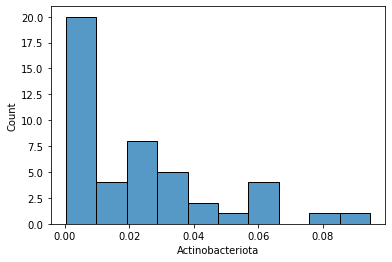

In [122]:
sns.histplot(by_phylum['Actinobacteriota'], bins=10)

Below is the distribution after applying an arcsin square root transformation. This now appears more normally distributed.

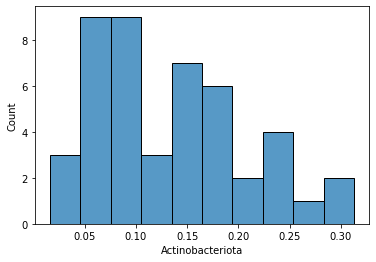

In [124]:
sns.histplot(by_phylum['Actinobacteriota'].apply(lambda x: np.arcsin(np.sqrt(x))), bins=10)

We can run a Kolmogorov-Smirnov test to see if the data is normally distributed. This test's null hypothesis is that the data's distribution is identical to a normal distribution, so if p < 0.05, the data should not be treated as normal.

In [137]:
print('P value for untransformed data: ',
      stats.kstest([x for x in by_phylum['Actinobacteriota']],
             cdf='norm')[1])

print('P value for transformed data: ',
      stats.kstest([x for x in by_phylum['Actinobacteriota'].apply(lambda x: np.arcsin(np.sqrt(x)))],
                    cdf='norm')[1])

P value for untransformed data:  3.65390202622604e-11
P value for transformed data:  1.871387525753185e-11


Even after being transformed, the data are not normally distributed, so they should not be treated as such.

## Machine Learning

Random forests work great with microbiome data! Here is an example of how to run one. I like to use random-state=42 because identifying a random state helps with reproducibility, and 42 is a good number :)

In [ ]:
! qiime sample-classifier classify-samples \
--i-table noMito_noChloro-filtered-table.qza \
--m-metadata-file metadata.tsv \
--m-metadata-column COLUMNOFINTEREST (must be categorical) \
--p-random-state 42 \
--p-estimator RandomForestClassifier \
--p-missing-samples ignore \ 
--output-dir random-forest-results

## Songbird

[Songbird](https://github.com/biocore/songbird) is a great tool for handling compositional data. I highly recommend looking into using it.